In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
df1 = pd.read_csv("archive/spam.csv", encoding='latin-1')[['v1', 'v2']]
df1.columns = ['label', 'text']

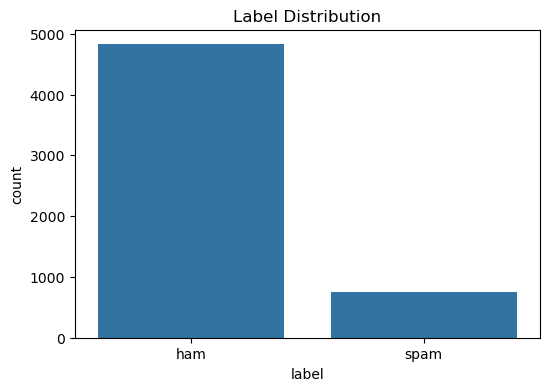

In [4]:
# Data Visualization
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='label')
plt.title("Label Distribution")
plt.show()

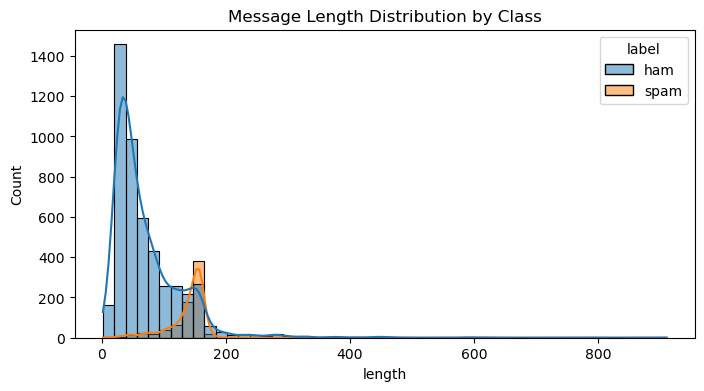

In [5]:
df1['length'] = df1['text'].apply(len)
plt.figure(figsize=(8,4))
sns.histplot(data=df1, x='length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution by Class")
plt.show()

In [6]:

X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size=0.2, random_state=42)
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [7]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

In [8]:
results = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    results[name] = (y_pred, classification_report(y_test, y_pred, output_dict=True))

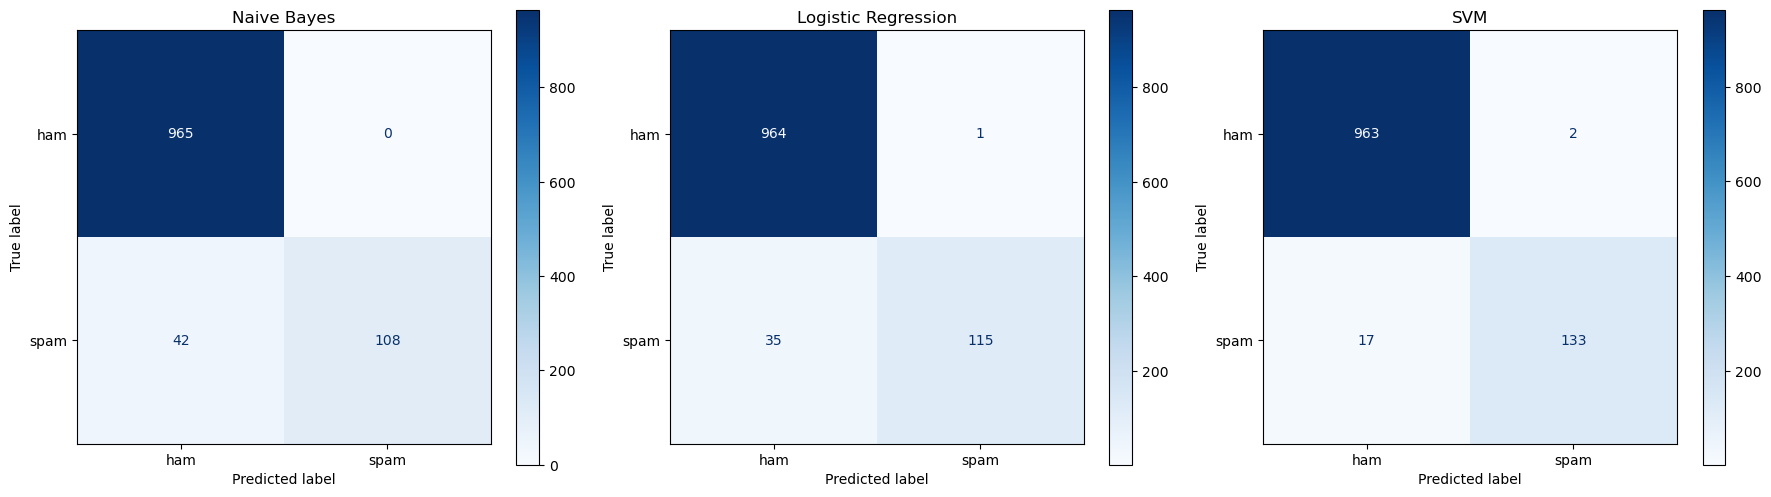

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, (y_pred, _)) in enumerate(results.items()):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[i], cmap='Blues')
    ax[i].set_title(name)
plt.tight_layout()
plt.show()

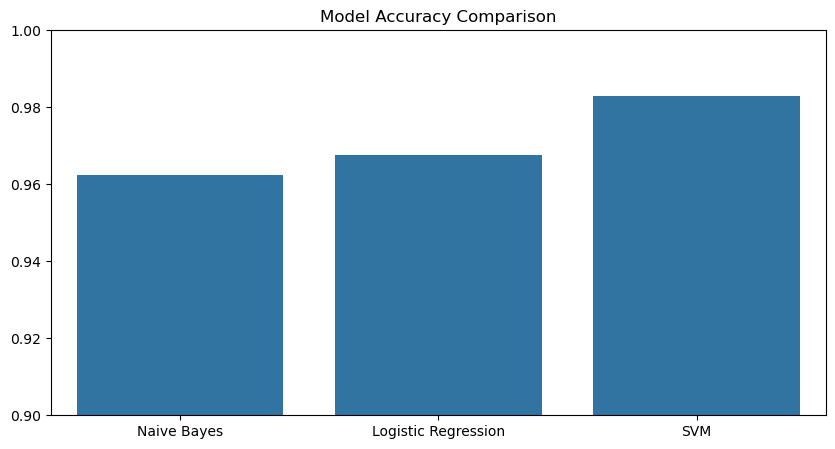

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
scores = {name: res[1]['accuracy'] for name, res in results.items()}
sns.barplot(x=list(scores.keys()), y=list(scores.values()), ax=ax)
ax.set_ylim(0.9, 1.0)
ax.set_title("Model Accuracy Comparison")
plt.show()